In [43]:
import file
import csv
from data_reader import read
from data_loader import file_paths_from
from data_event import DataEvent

paths = file_paths_from("../test/PuBe08072024-1")

with open("super_new_events.csv", mode='w') as events_file:
    events_writer = csv.writer(events_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    events_writer.writerow(['channel', 'energy', 'overflow', 'pile_up', 'tof', 'time'])
    for path in paths:
        if ".bin" in path:
            continue

        print(f"Begin read file at path {path}")
        with open(path, "rb") as f:
            while (event_bytes := f.read(16)):
                event = DataEvent.from_bytes(event_bytes)
                if 512 <= event.channel <= 639:
                    events_writer.writerow([event.channel, event.energy, event.overflow, event.pile_up, event.tof, event.time])
print("Events have been recorded in new_events.csv file")

Begin read file at path ../test/PuBe08072024-1
Events have been recorded in new_events.csv file


In [44]:
import file
import csv
from data_reader import read
from data_loader import file_paths_from
from data_event import DataEvent

In [54]:
!pip install pandas
import pandas as pd
data = pd.read_csv('super_new_events.csv')
print("DATA load")


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DATA load


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229794 entries, 0 to 12229793
Data columns (total 6 columns):
 #   Column    Dtype
---  ------    -----
 0   channel   int64
 1   energy    int64
 2   overflow  int64
 3   pile_up   int64
 4   tof       int64
 5   time      int64
dtypes: int64(6)
memory usage: 559.8 MB


In [56]:
data.head()

,channel,energy,overflow,pile_up,tof,time
0,560,17177,0,0,0,14261333408
1,568,11249,0,0,0,14265516647
2,568,10045,0,0,0,14266403886
3,568,8536,0,0,0,14266586574
4,576,16311,0,0,0,14261315421


In [57]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from matplotlib.backends.backend_pdf import PdfPages
pdf_pages = PdfPages('super_new_energy_histograms.pdf')

In [59]:
with open('new_chan_decode_neutrons.txt', 'r') as file:
    schet = file.readlines()
schet = [int(line.strip()) for line in schet]
my_dict = {i: schet[i - 512] for i in range(512, len(schet) + 512)}
sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))
sorted_dict = {k: v for k, v in sorted_dict.items() if v != 0}  
sorted_keys = sorted_dict.keys()
print(sorted_keys)


dict_keys([552, 555, 557, 559, 610, 613, 616, 619, 621, 623, 609, 612, 615, 618, 545, 548, 551, 554, 546, 549, 563, 565, 567, 569, 571, 573, 592, 594, 596, 598, 624, 634, 626, 629, 632, 635, 637, 532, 533, 536, 539, 541, 543, 561, 562, 564, 566, 568, 570, 572, 574, 575, 593, 595, 597, 625, 638, 631, 639, 627, 630, 633, 628, 636, 529, 530, 528, 531, 540, 542, 534, 560, 553, 544, 578, 556, 558, 576, 589, 579, 580, 583, 582, 588, 585, 622, 620, 617, 614, 591, 608, 584, 587, 516, 514, 517, 520, 519, 523, 525, 522, 535, 515, 518, 521, 524, 526, 550, 577, 581, 586, 590, 513, 611, 527, 547])


In [60]:
for i in sorted_keys:
    filtered_data = data[data['channel'] == i]
    filtered_data_over1 = filtered_data[filtered_data['overflow'] == 1]
    filtered_data_over0 = filtered_data[filtered_data['overflow'] == 0]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца
    
    # Гистограмма для overflow = 1
    axes[1].hist(filtered_data_over1['energy'], bins=500)
    axes[1].set_xlabel('Каналы')
    axes[1].set_ylabel('Количество событий')
    axes[1].set_title('Event id = ' + str(i) + ', counter = ' + str(sorted_dict[i]) + ' (overflow 1)')
    axes[1].set_xlim(left=0)  # Установка минимального значения по оси X
    axes[1].set_xlim(right=32768)  # Установка минимального значения по оси X
    axes[1].set_ylim(bottom=0)  # Установка минимального значения по оси Y
    
    # Гистограмма для overflow = 0
    axes[0].hist(filtered_data_over0['energy'], bins=500)
    axes[0].set_xlabel('Каналы')
    axes[0].set_ylabel('Количество событий')
    axes[0].set_title('Event id = ' + str(i) + ', counter = ' + str(sorted_dict[i]) + ' (overflow 0)')
    axes[0].set_xlim(left=0)  # Установка минимального значения по оси X
    axes[0].set_xlim(right=32768)
    axes[0].set_ylim(bottom=0)  # Установка минимального значения по оси Y
    
    plt.tight_layout()  # Устраняет наложение осей
    pdf_pages.savefig(fig)
    plt.close(fig)
    
pdf_pages.close()

In [61]:
pdf_pages1 = PdfPages('super_new_total_histograms.pdf')

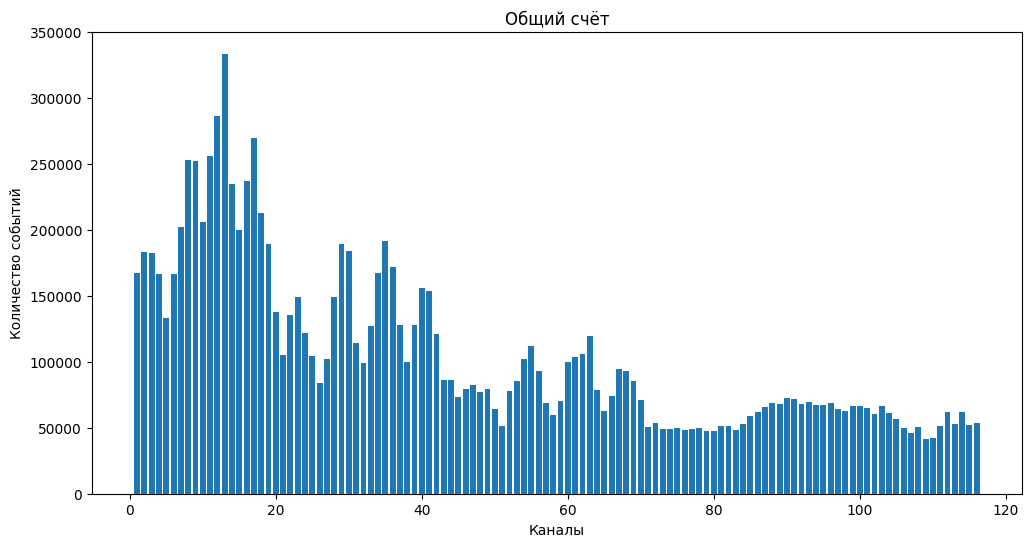

In [62]:
lengths = [len(data[data['channel'] == i]) for i in sorted_keys]

# Получаем значения элементов sorted_dict по ключам
x_labels = [sorted_dict[key] for key in sorted_keys]

plt.figure(figsize=(12, 6))  # Установка размера изображения
plt.bar(x_labels, lengths)  # Используем x_labels для меток по оси x

# Настройка осей
plt.xlabel('Каналы')
plt.ylabel('Количество событий')
plt.title('Общий счёт')

# Сохранение в файл
plt.savefig('super_new_total_histograms.pdf') 

In [27]:
place = {}
with open('SFiNx_counters_geometry.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    for row in reader:
        numbers = row[0].split(';')
        numbers = [float(number) for number in numbers]
        key = int(numbers[0])
        value = [numbers[1], numbers[2]]
        place[key] = value
print(place)

{1: [-5.7108595209, 9.8664118874], 2: [-1.9561841658, 10.3161690326], 3: [1.9623922896, 10.3149898934], 4: [5.6713482116, 9.8891763794], 5: [9.2199239685, 9.1647696106], 6: [9.8664118874, 5.7108595209], 7: [10.3161690326, 1.9561841658], 8: [10.3149898934, -1.9623922896], 9: [9.8891763794, -5.6713482116], 10: [9.1647696106, -9.2199239685], 11: [5.7108595209, -9.8664118874], 12: [1.9561841658, -10.3161690326], 13: [-1.9623922896, -10.3149898934], 14: [-5.6713482116, -9.8891763794], 15: [-9.2199239685, -9.1647696106], 16: [-9.8664118874, -5.7108595209], 17: [-10.3161690326, -1.9561841658], 18: [-10.3149898934, 1.9623922896], 19: [-9.8891763794, 5.6713482116], 20: [-9.1647696106, 9.2199239685], 21: [-8.6808658058, 14.149295702], 22: [-4.4773834939, 14.5255993697], 23: [0.0438000231, 14.5999342998], 24: [4.5847232152, 14.4920775957], 25: [8.748630977, 14.1074964479], 26: [12.4748891468, 12.4151979757], 27: [14.149295702, 8.6808658058], 28: [14.5255993697, 4.4773834939], 29: [14.5999342998, 

In [75]:
recolour = [1, 3, 5]  # Пример некорректных датчиков

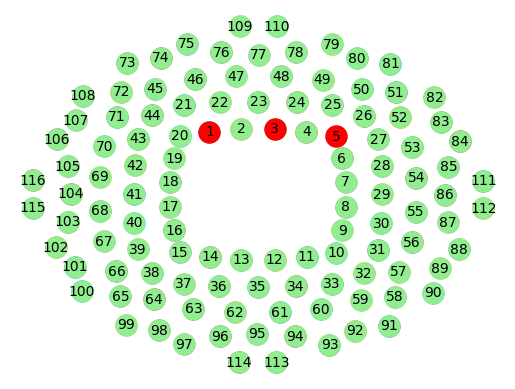

In [77]:
radius = 15

# Преобразование радиуса в единицы измерения графика
# Предполагается, что 2 мм соответствуют 1 единице на графике

# Создание графика
fig, ax = plt.subplots()

# Рисование точек с лейблами
for key, value in place.items():
    x, y = value
    if int(key) in recolour:  # Проверка, есть ли лейбл в массиве
        color = 'red'
    else:
        color = 'lightgreen'
    ax.plot(x, y, 'o', markersize=radius, label=key)
    ax.plot(x, y, 'o', markersize=radius, color=color, label=key)  # Использование переменной color
    ax.text(x, y, key, ha='center', va='center', fontsize=10)

ax.axis('off')
plt.savefig('counter.pdf') 

plt.show()